
PROBLEM STATEMENT: THIS PROJECT UNDERSTAND HOW THE OTHER FACTORS GIVEN IN DATA: such as Gender, Ethnicity, Parental level of education etc
affect the student perfomance in exam

Data soure: Kaggle Student performance dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download


In [3]:
#Importing neccessary libraries need to EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read the dataset
df = pd.read_csv('/home/Rahul/Desktop/End_to_End_ML_Projects/Notebook/Data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

DATASET INFORMATION

In [7]:
#Checking the missing value
df.isnull().sum() #No misssing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#Know the categories of categorial features.

print('Categories in gender variable : ', end = ' ')
print( df['gender'].unique())

print('Categories in race_ethinicity variable: ', end = ' ')
print(df['race/ethnicity'].unique())

print('Categories in parental level of education variable : ', end = ' ')
print(df['parental level of education'].unique())

print('Categories in lunch variable: ', end = ' ')
print(df['lunch'].unique())

print('Categories in test preparation course variable: ', end = ' ')
print(df['test preparation course'].unique())

Categories in gender variable :  ['female' 'male']
Categories in race_ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']


In [31]:
#To know the unique values of all features with single command
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [43]:
#Create and know the list of numerical featuers 
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [49]:
#Feature Engineering by adding two information columns one is total score and one average
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3


In [50]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
#Now students those get full marks in one subject 
reading_full = df[df['reading score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()


print(f'Number of student with full marks in reading : {reading_full}')
print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of student with full marks in reading : 17
Number of students with full marks in maths: 7
Number of students with full marks in writing: 14


In [52]:
#Now number of students those get less marks in any subject
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()
wrting_less_20 = df[df['writing score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in reading : {reading_less_20}')

Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in reading : 1


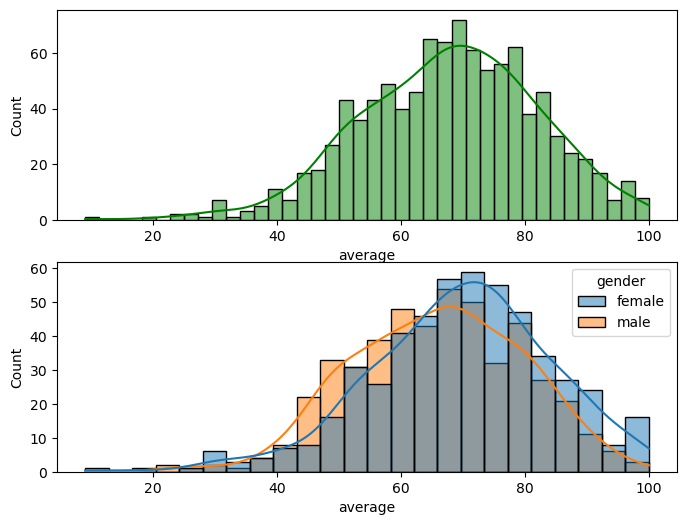

In [53]:
#Exploratory data visualization Histogram and Kernel Density Estimate (KDE) 
fig, axs = plt.subplots(2,1, figsize = (8,6))
plt.subplot(211) # 2-two rows, 1-first_column, 1-first_subplot
sns.histplot(data =df, x='average', bins = 40, kde = True, color = 'g')
plt.subplot(212)
sns.histplot(data =df, x = 'average', kde = True, hue = 'gender')
plt.show()

#Female students perform well in the exam

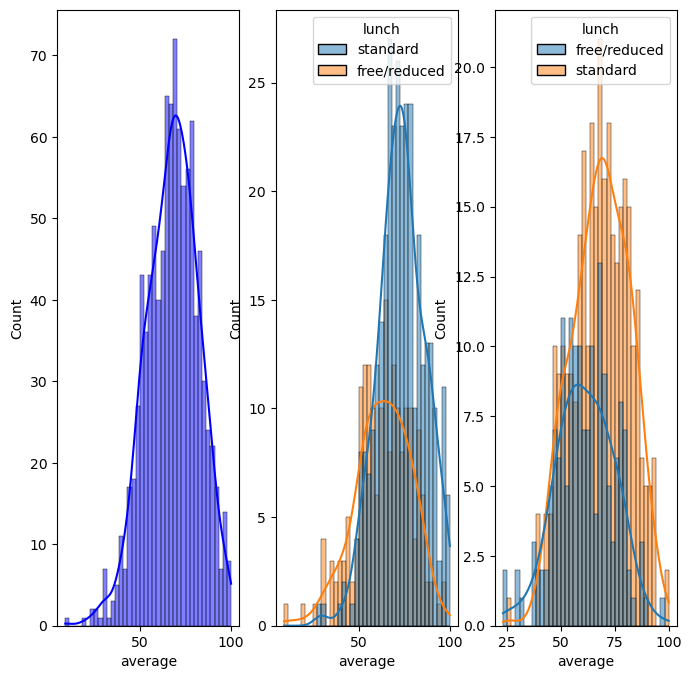

In [54]:
#Now average wrt to lunck hist of Kde (kernel density estimator plot) plot
fig, axs = plt.subplots(1,3, figsize=(8,8))
plt.subplot(131) #one row four column the figure is first
sns.histplot(data = df, x = 'average', bins = 40, kde = True, color = 'b')
plt.subplot(132) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'female'], x = 'average', bins = 40, kde = True, hue = 'lunch')
plt.subplot(133) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'male'], x = 'average', bins = 40, kde = True, hue = 'lunch')
plt.show()

# Standard Lunch is a factor that effect the perfomance (well) in exam

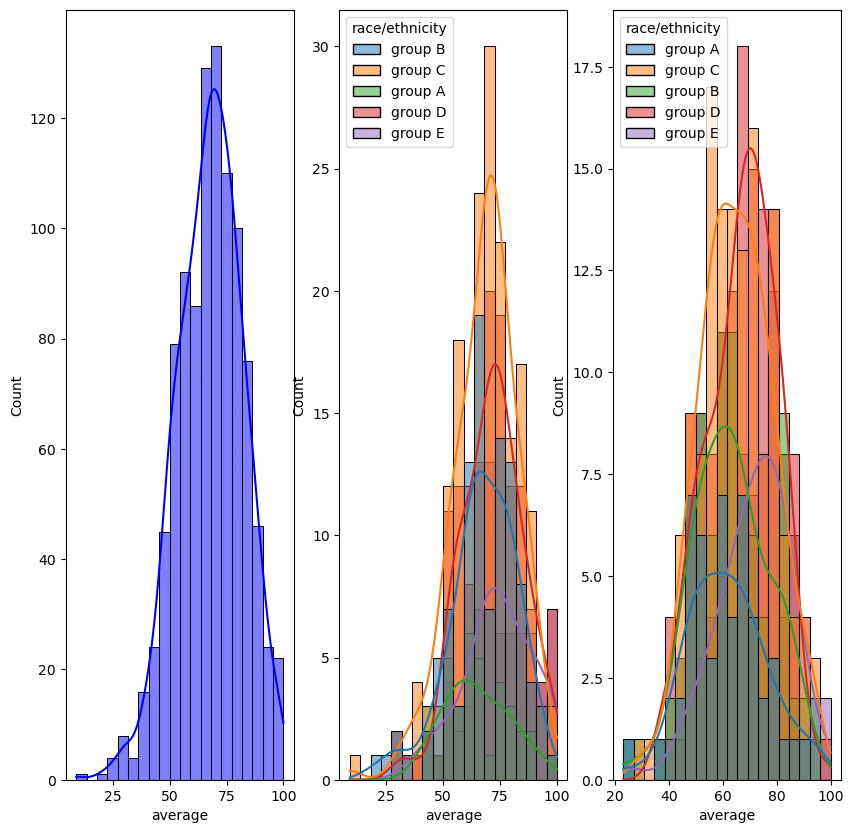

In [55]:
#Now average wrt to lunck hist of Kde (kernel density estimator plot) plot
fig, axs = plt.subplots(1,3, figsize=(10,10))
plt.subplot(131) #one row four column the figure is first
sns.histplot(data = df, x = 'average', bins = 20, kde = True, color = 'b')
plt.subplot(132) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'female'], x = 'average', bins = 20, kde = True, hue = 'race/ethnicity')
plt.subplot(133) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'male'], x = 'average', bins = 20, kde = True, hue = 'race/ethnicity')
plt.show()

"""
#Here Group-C male and female both performed well.
#Group-D male perfome well in comparison to female.
# Group-A, B perfrom poor, whether they are male of feamle
"""

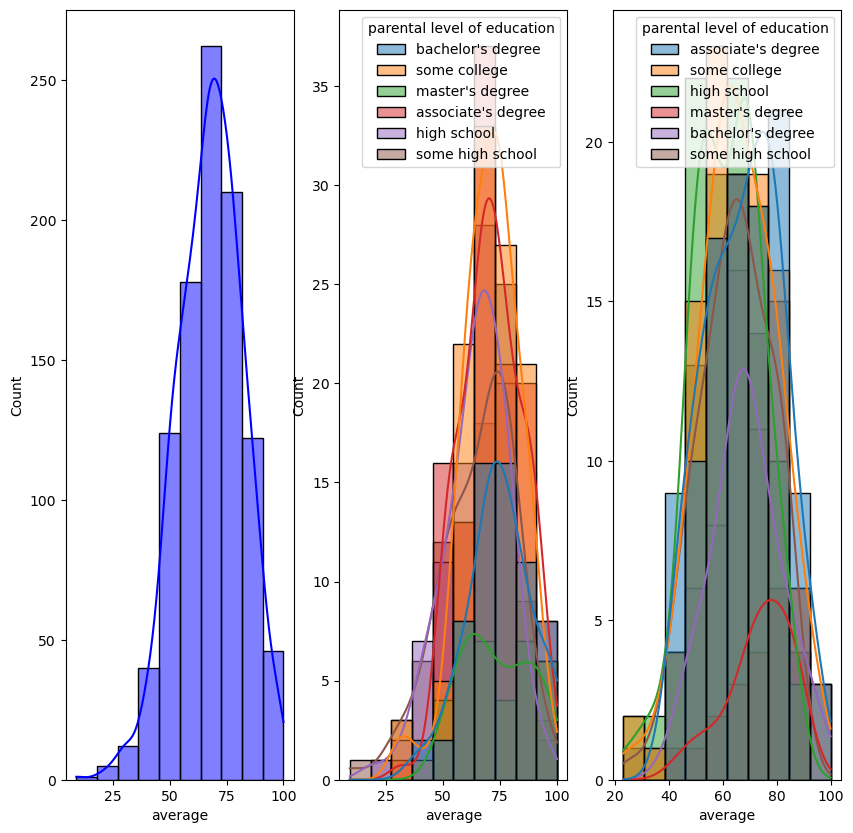

In [56]:
#Now average wrt to lunck hist of Kde (kernel density estimator plot) plot
fig, axs = plt.subplots(1,3, figsize=(10,10))
plt.subplot(131) #one row four column the figure is first
sns.histplot(data = df, x = 'average', bins = 10, kde = True, color = 'b')
plt.subplot(132) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'female'], x = 'average', bins = 10, kde = True, hue = 'parental level of education')
plt.subplot(133) # one row four column the figure is second
sns.histplot(data = df[df.gender == 'male'], x = 'average', bins = 10, kde = True, hue = 'parental level of education')
plt.show()

# No effect of parental level of education on female.

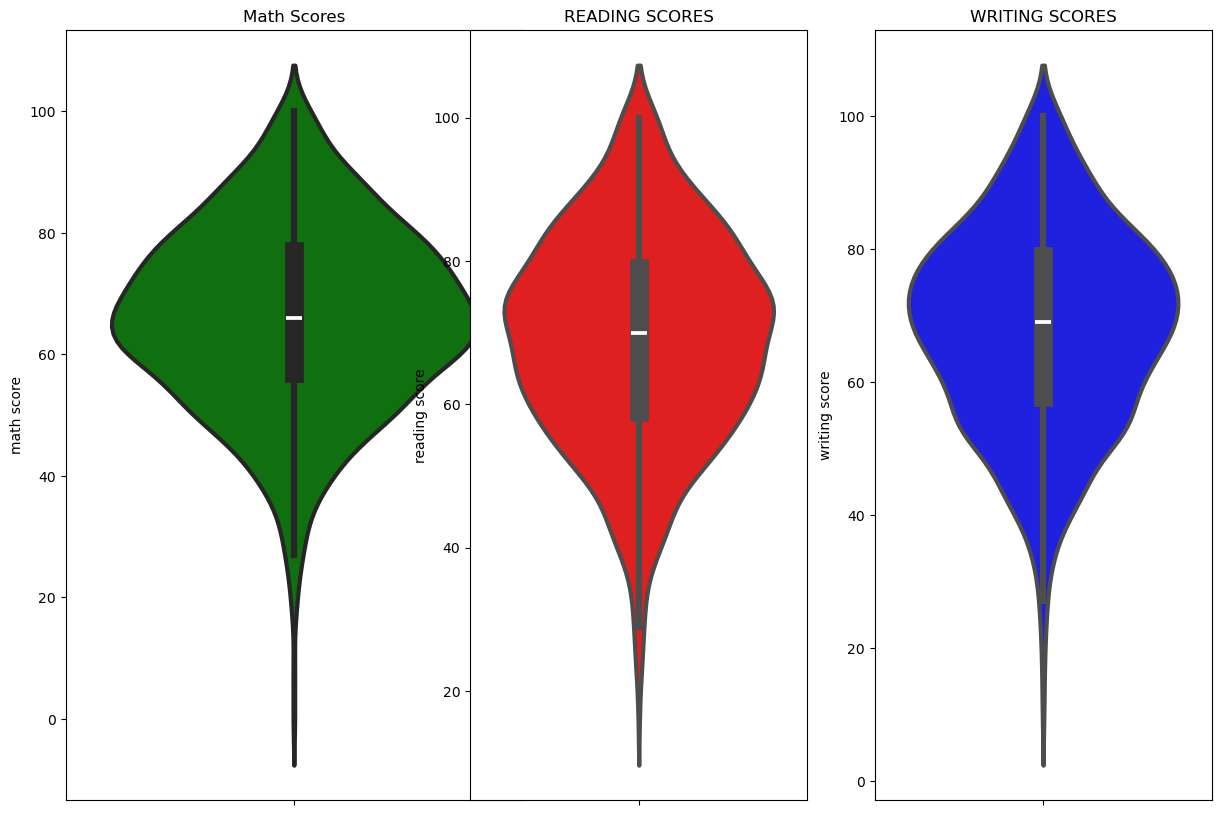

In [57]:
#MAXIMUM SCORE OF STUDENTS IN ALL SUBJECTS
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.violinplot(y='math score', data = df, color = 'g', linewidth =3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80"


In [ ]:
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score  

Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test preparation course variable:  ['none' 'completed']

<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

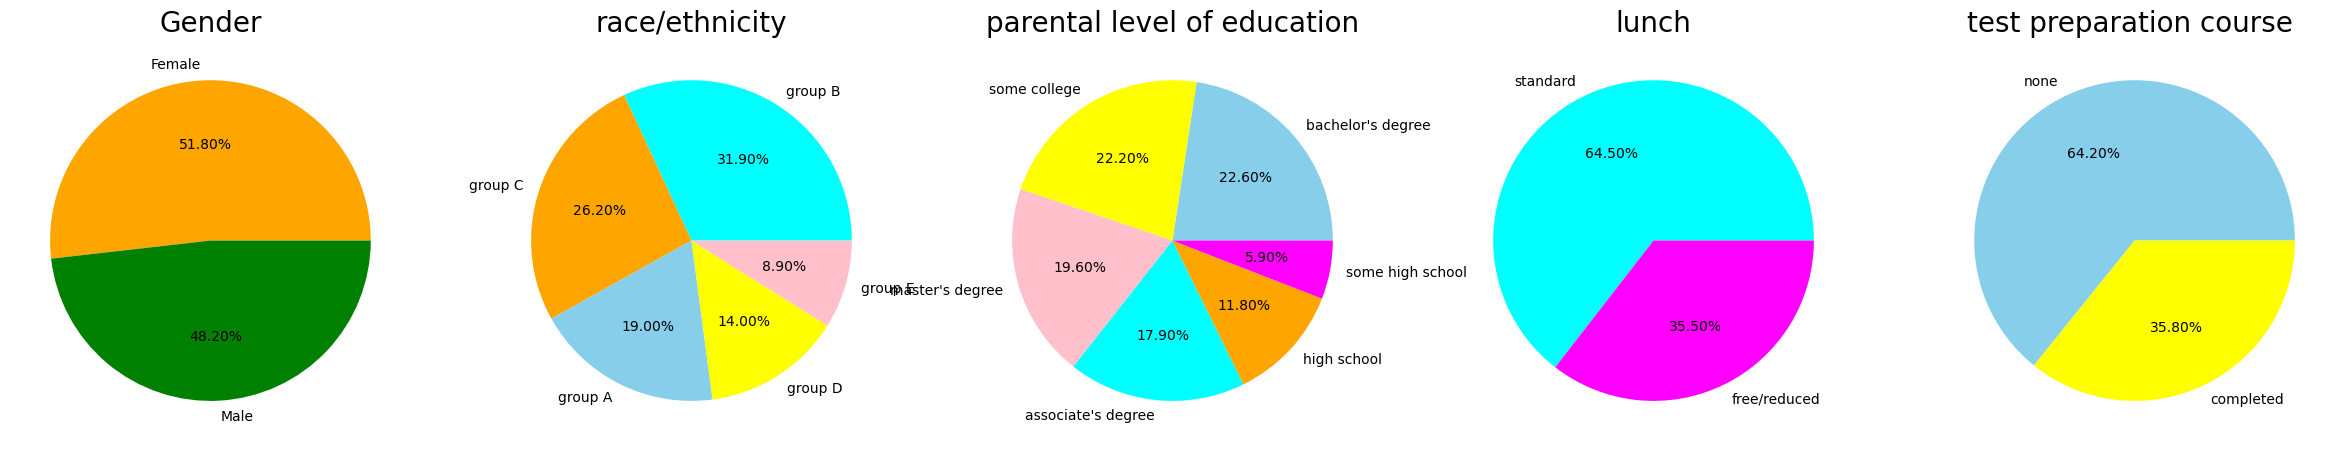

In [73]:
#Multivariate analysis

plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['orange', 'green']
plt.pie(size, colors = color, labels = labels, autopct= '%.2f%%')
plt.title('Gender', fontsize =20)
plt.axis

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
color = ['cyan', 'orange', 'skyblue', 'yellow', 'pink']
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
plt.pie(size, colors = color, labels = labels, autopct= '%.2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis


plt.subplot(1,5,3)
size = df['parental level of education'].value_counts()
labels = ["bachelor's degree",'some college', "master's degree", "associate's degree", 'high school', 'some high school']
color = ['skyblue', 'yellow', 'pink','cyan', 'orange', 'magenta' ]
plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('parental level of education', fontsize = 20)
plt.axis

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = ['standard','free/reduced']
color = ['cyan', 'magenta']
plt.pie(size, colors = color, labels = labels, autopct= '%.2f%%')
plt.title('lunch', fontsize =20)
plt.axis

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
labels = ['none','completed']
color = ['skyblue', 'yellow']
plt.pie(size, colors = color, labels = labels, autopct= '%.2f%%')
plt.title('test preparation course ', fontsize =20)
plt.axis



Number of Male and Female students is almost equal
Number students are greatest in Group
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College " is greater followed closely by "Associate's Degree", and 'some high school'
    lowest. 


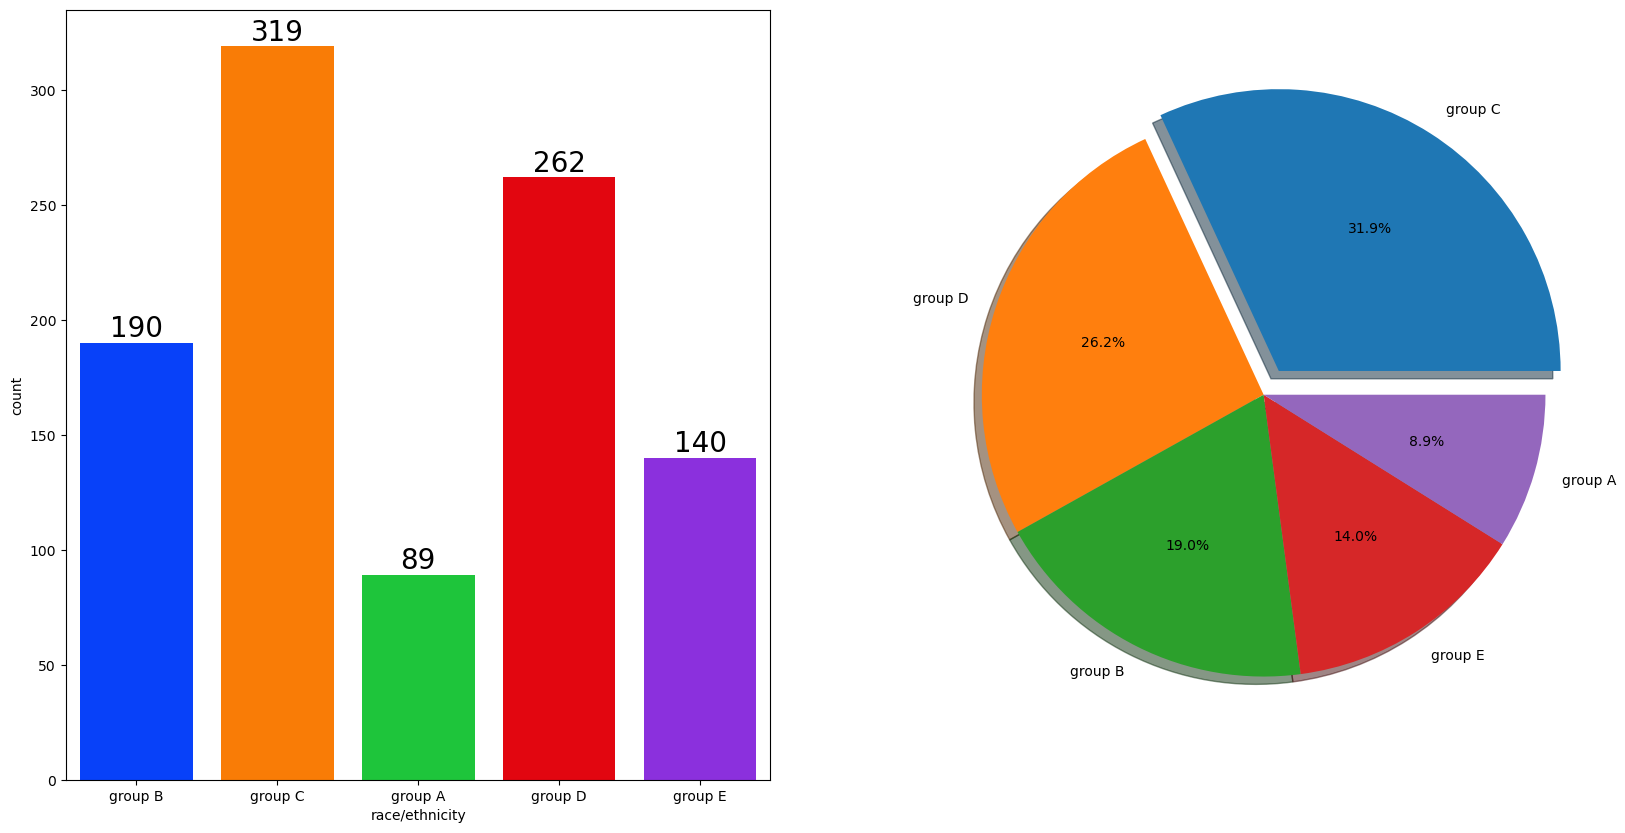

In [75]:
#UNIVARIATE ANALYSIS
f, ax = plt.subplots(1,2, figsize = (20, 10))
sns.countplot(x=df['race/ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
plt.pie(x = df['race/ethnicity'].value_counts(), labels = df['race/ethnicity'].value_counts().index, explode = [0.1,0,0,0,0],
        autopct='%1.1f%%',shadow=True)
plt.show()


In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))\n",
    "sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)\n",
    "for container in ax[0].containers:\n",
    "    ax[0].bar_label(container,color='black',size=20)\n",
    "    \n",
    "plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)\n",
    "plt.show()   "